In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Achaios_Stages_Times_Sec.csv με (91, 9)
Δημιουργήθηκε dataframe για το Aigio_Stages_Times_Sec.csv με (69, 9)
Δημιουργήθηκε dataframe για το Almiros_Stages_Times_Sec.csv με (99, 9)
Δημιουργήθηκε dataframe για το Boiotias_Stages_Times_Sec.csv με (204, 9)
Δημιουργήθηκε dataframe για το Deth_Stages_Times_Sec.csv με (143, 9)
Δημιουργήθηκε dataframe για το Fthinoporino_Stages_Times_Sec.csv με (121, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_G_Stages_Times_Sec.csv με (111, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_T_Stages_Times_Sec.csv με (183, 9)
Δημιουργήθηκε dataframe για το Graikas_Stages_Times_Sec.csv με (79, 9)
Δημιουργήθηκε dataframe για το Kentavros_Stages_Times_Sec.csv με (271, 9)
Δημιουργήθηκε dataframe για το Korinthou_Stages_Times_Sec.csv με (96, 9)
Δημιουργήθηκε dataframe για το Kritis_Stages_Times_Sec.csv με (188, 9)
Δημιουργήθηκε dataframe για το Livadia_Stages_Times_Sec.csv με (131, 9)
Δημιουργήθηκε dataframe για το Olympiako_Stages_Times_S

In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Achaios 1     392.82
        2     384.84
        3     379.10
Aigio   1     573.76
        2     580.53
...              ...
Stereas 1     183.52
        2     658.94
        3     969.58
        4     642.51
        5     970.14

[76 rows x 1 columns]

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['Crew'] = total_ss_times_F['Crew'].str[:8]
total_ss_times_F.to_csv('greek_rallies_2023_stages_times.csv', index=False)

In [4]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
0,Peroulak,C2,1,Achaios,24/9/2023,Tarmac,Cup,1,392.82,392.82,Achaios_01,0.00,0.000000
1,Koukeas,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87,392.82,Achaios_01,2.05,0.521868
2,Stafilop,4 2000+,1,Achaios,24/9/2023,Tarmac,Cup,3,399.10,392.82,Achaios_01,6.28,1.598697
3,Karathan,C5 F2,1,Achaios,24/9/2023,Tarmac,Cup,4,408.80,392.82,Achaios_01,15.98,4.068021
4,Daskalop,C2,1,Achaios,24/9/2023,Tarmac,Cup,5,409.94,392.82,Achaios_01,17.12,4.358230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,Yiangou,C2,5,Stereas,4/6/2023,Gravel,Championship,23,1287.92,970.14,Stereas_05,317.78,32.756097
2422,Andrikop,C5 F2,5,Stereas,4/6/2023,Gravel,Championship,24,1412.87,970.14,Stereas_05,442.73,45.635681
2423,Vassilak,C1,5,Stereas,4/6/2023,Gravel,Championship,25,1525.70,970.14,Stereas_05,555.56,57.265962
2424,Giokaris,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,26,1562.13,970.14,Stereas_05,591.99,61.021090


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Gr/Cl'].str.contains('C1')]
total_ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
1,Koukeas,C1,1,Achaios,24/9/2023,Tarmac,Cup,2,394.87,392.82,Achaios_01,2.05,0.521868
16,Nomikos,C1,1,Achaios,24/9/2023,Tarmac,Cup,17,443.87,392.82,Achaios_01,51.05,12.995774
33,Koukeas,C1,2,Achaios,24/9/2023,Tarmac,Cup,1,384.84,384.84,Achaios_02,0.00,0.000000
40,Nomikos,C1,2,Achaios,24/9/2023,Tarmac,Cup,8,424.07,384.84,Achaios_02,39.23,10.193847
63,Koukeas,C1,3,Achaios,24/9/2023,Tarmac,Cup,1,379.10,379.10,Achaios_03,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,Papadimi,C1,5,Stereas,4/6/2023,Gravel,Championship,3,990.62,970.14,Stereas_05,20.48,2.111036
2403,Serderid,C1,5,Stereas,4/6/2023,Gravel,Championship,5,1022.52,970.14,Stereas_05,52.38,5.399221
2404,Panteli,C1,5,Stereas,4/6/2023,Gravel,Championship,6,1026.40,970.14,Stereas_05,56.26,5.799163
2405,J.J. -,C1,5,Stereas,4/6/2023,Gravel,Championship,7,1075.36,970.14,Stereas_05,105.22,10.845857


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                Aligizak  Anapolio  Angelov   Chatzima  Flandy    \
Race    SS.                                                            
Achaios Achaios_01       NaN       NaN       NaN       NaN       NaN   
        Achaios_02       NaN       NaN       NaN       NaN       NaN   
        Achaios_03       NaN       NaN       NaN       NaN       NaN   
Aigio   Aigio_01         NaN       NaN       NaN       NaN       NaN   
        Aigio_02         NaN       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
Stereas Stereas_01       NaN       NaN       NaN       NaN       NaN   
        Stereas_02       NaN       NaN       NaN       NaN       NaN   
        Stereas_03       NaN       NaN       NaN       NaN       NaN   
        Stereas_04       NaN       NaN       NaN       NaN       NaN   
        Stereas_05       NaN       NaN       NaN       NaN       NaN   

Crew                Ieremiad  J.J.  -   Kampilis  Kechagia  Kehagias  ...  \
Race    SS.                                                           ...   
Achaios Achaios_01       NaN       NaN       NaN       NaN       NaN  ...   
        Achaios_02       NaN       NaN       NaN       NaN       NaN  ...   
        Achaios_03       NaN       NaN       NaN       NaN       NaN  ...   
Aigio   Aigio_01         NaN       NaN       NaN       NaN       NaN  ...   
        Aigio_02         NaN       NaN       NaN       NaN       NaN  ...   
...                      ...       ...       ...       ...       ...  ...   
Stereas Stereas_01       NaN     46.70       NaN       NaN      9.27  ...   
        Stereas_02       NaN     84.95       NaN       NaN     28.47  ...   
        Stereas_03       NaN    101.19       NaN       NaN     22.55  ...   
        Stereas_04       NaN    103.73       NaN       NaN    266.60  ...   
        Stereas_05       NaN    105.22       NaN       NaN     17.50  ...   

Crew                Nomikos   Panteli   Papadimi  Philippe  Serderid  \
Race    SS.                                                            
Achaios Achaios_01     51.05       NaN       NaN       NaN       NaN   
        Achaios_02     39.23       NaN       NaN       NaN       NaN   
        Achaios_03     40.13       NaN       NaN       NaN       NaN   
Aigio   Aigio_01       12.66       NaN       NaN       NaN       NaN   
        Aigio_02       15.29       NaN       NaN       NaN       NaN   
...                      ...       ...       ...       ...       ...   
Stereas Stereas_01       NaN     16.18      2.16       NaN     17.31   
        Stereas_02       NaN     43.48      0.00       NaN     49.19   
        Stereas_03       NaN     93.84     28.81       NaN     55.13   
        Stereas_04       NaN     48.92     28.76       NaN    176.88   
        Stereas_05       NaN     56.26     20.48       NaN     52.38   

Crew                Tsolakid  Tsouloft  Vassilak  Velanis   Xanthako  
Race    SS.                                                           
Achaios Achaios_01       NaN       NaN       NaN       NaN       NaN  
        Achaios_02       NaN       NaN       NaN       NaN       NaN  
        Achaios_03       NaN       NaN       NaN       NaN       NaN  
Aigio   Aigio_01         NaN       NaN       NaN       NaN       NaN  
        Aigio_02         NaN       NaN       NaN       NaN       NaN  
...                      ...       ...       ...       ...       ...  
Stereas Stereas_01       NaN      0.00     34.98       NaN       NaN  
        Stereas_02       NaN    181.51    144.58       NaN       NaN  
        Stereas_03       NaN      0.00    239.99       NaN       NaN  
        Stereas_04       NaN      0.00    212.56       NaN       NaN  
        Stereas_05       NaN      0.00    555.56       NaN       NaN  

[73 rows x 21 columns]

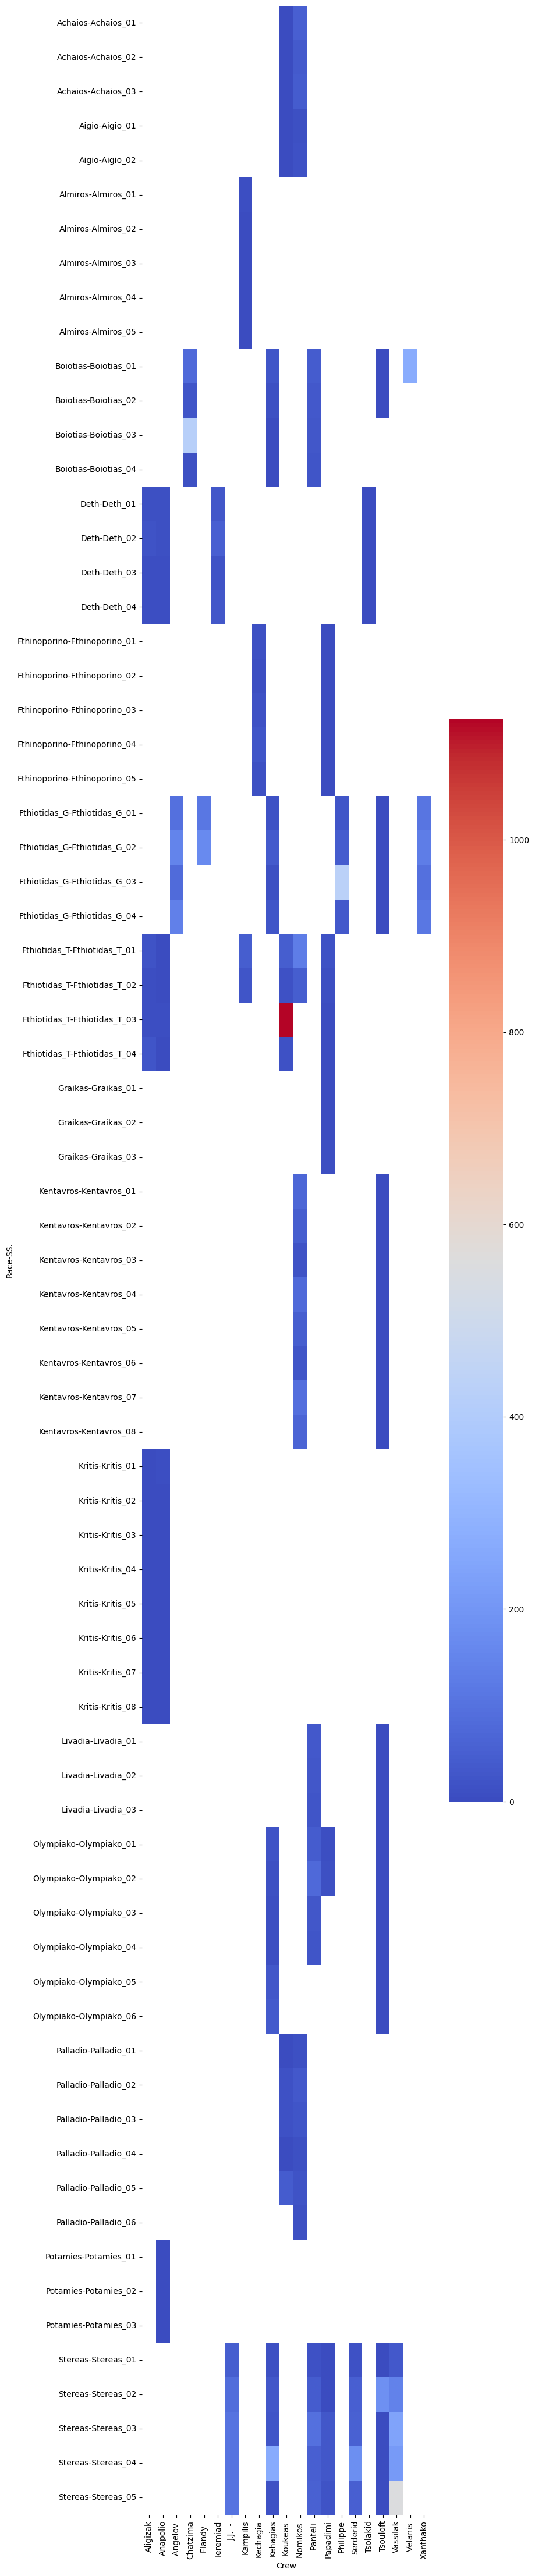

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1.jpg")
plt.show()